In [ ]:
from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
#Install pillow
from PIL import Image
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import seaborn as sns; sns.set()
%matplotlib inline

In [4]:
def obtener_dataframe(ruta):# Ruta de la carpeta de imágenes
    cont = 0
    df_completa = pd.DataFrame()
    df_completa = df_completa.assign(Pixeles_imagen=list, Descripcion='')
    for i in ruta:
        print(i)
        carpeta_imagenes = '../doc/train/'+ str(i)

 

        # Crear una lista para almacenar los datos de las imágenes
        datos_imagenes = []

 

        # Recorrer la carpeta de imágenes
        for archivo in os.listdir(carpeta_imagenes):
            # Obtener la ruta completa del archivo
            ruta_archivo = os.path.join(carpeta_imagenes, archivo)

 

            # Verificar si el archivo es una imagen
            if os.path.isfile(ruta_archivo) and archivo.lower().endswith(('.png', '.jpg', '.jpeg')):
                try:
                    # Abrir la imagen usando PIL
                    imagen = Image.open(ruta_archivo)

 

                    # Aquí puedes realizar cualquier preprocesamiento necesario en la imagen

 

                    # Obtener los datos de la imagen (por ejemplo, los píxeles)
                    datos_imagen = imagen.getdata()

 

                    # Agregar los datos al listado
                    datos_imagenes.append(datos_imagen)

 

                except Exception as e:
                    print(f"Error al procesar la imagen {archivo}: {e}")
        # Crear un DataFrame a partir de los datos de las imágenes
        df_imagenes = pd.DataFrame(datos_imagenes)
        # Opcional: Asignar nombres a las columnas del DataFrame
        columnas = [f"Pixeles_imagen" for i in range(df_imagenes.shape[1])]
        df_imagenes.columns = columnas
        # Opcional: Agregar una columna para etiquetas/clases (si tienes esa información)
        # Guardar el DataFrame en un archivo CSV (opcional)
        df_imagenes.to_csv('imagenes.csv', index=False)
        df_imagenes = df_imagenes.assign(Descripcion=i)
        df_completa = pd.merge(df_completa, df_imagenes, how = 'outer')
        cont = cont + 1
        df_anterior = df_imagenes
    return df_completa

In [9]:
df_total = obtener_dataframe(['Black-grass','Charlock','Cleavers','Common Chickweed','Common wheat','Fat Hen','Loose Silky-bent','Maize','Scentless Mayweed','Shepherds Purse','Small-flowered Cranesbill','Sugar beet'])

Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse
Small-flowered Cranesbill
Sugar beet


In [10]:
df_total

,Pixeles_imagen,Descripcion
0,"((80, 50, 27), (71, 42, 18), (83, 57, 36), (89...",Black-grass
1,"((55, 43, 37), (54, 43, 37), (57, 46, 40), (58...",Black-grass
2,"((45, 32, 24), (44, 30, 21), (45, 30, 22), (46...",Black-grass
3,"((108, 84, 51), (112, 89, 56), (110, 88, 54), ...",Black-grass
4,"((162, 162, 165), (163, 161, 165), (158, 157, ...",Black-grass
...,...,...
4745,"((97, 94, 98), (94, 88, 93), (86, 82, 87), (80...",Sugar beet
4746,"((92, 63, 35), (96, 67, 38), (94, 64, 34), (84...",Sugar beet
4747,"((72, 56, 44), (75, 63, 52), (75, 65, 53), (69...",Sugar beet
4748,"((145, 141, 144), (143, 139, 143), (146, 142, ...",Sugar beet


In [11]:
import os
import pandas as pd

# Ruta del directorio principal que contiene las carpetas con las imágenes
directorio_principal = '../doc/train/'

# Listas para almacenar las rutas de las imágenes y los nombres de las carpetas
imagenes = []
carpetas = []

# Recorre todas las carpetas y archivos en el directorio principal
for carpeta in os.listdir(directorio_principal):
    carpeta_ruta = os.path.join(directorio_principal, carpeta)  # Ruta completa de la carpeta
    if os.path.isdir(carpeta_ruta):  # Comprueba si es una carpeta
        for imagen in os.listdir(carpeta_ruta):
            imagen_ruta = os.path.join(carpeta_ruta, imagen)  # Ruta completa de la imagen
            if os.path.isfile(imagen_ruta):  # Comprueba si es un archivo
                imagenes.append(imagen_ruta)
                carpetas.append(carpeta)

# Crea el dataframe
data = pd.DataFrame({'x': imagenes, 'y': carpetas})

# Muestra el dataframe
print(data)

                                           x            y
0     ../doc/train/Black-grass\0050f38b3.png  Black-grass
1     ../doc/train/Black-grass\0183fdf68.png  Black-grass
2     ../doc/train/Black-grass\0260cffa8.png  Black-grass
3     ../doc/train/Black-grass\05eedce4d.png  Black-grass
4     ../doc/train/Black-grass\075d004bc.png  Black-grass
...                                      ...          ...
4746   ../doc/train/Sugar beet\fc293eacb.png   Sugar beet
4747   ../doc/train/Sugar beet\fc441208c.png   Sugar beet
4748   ../doc/train/Sugar beet\fed9406b2.png   Sugar beet
4749   ../doc/train/Sugar beet\fef5e7066.png   Sugar beet
4750   ../doc/train/Sugar beet\ffa401155.png   Sugar beet

[4751 rows x 2 columns]


In [12]:
data

,x,y
0,../doc/train/Black-grass\0050f38b3.png,Black-grass
1,../doc/train/Black-grass\0183fdf68.png,Black-grass
2,../doc/train/Black-grass\0260cffa8.png,Black-grass
3,../doc/train/Black-grass\05eedce4d.png,Black-grass
4,../doc/train/Black-grass\075d004bc.png,Black-grass
...,...,...
4746,../doc/train/Sugar beet\fc293eacb.png,Sugar beet
4747,../doc/train/Sugar beet\fc441208c.png,Sugar beet
4748,../doc/train/Sugar beet\fed9406b2.png,Sugar beet
4749,../doc/train/Sugar beet\fef5e7066.png,Sugar beet


In [15]:
import os
import pandas as pd
from PIL import Image

# Ruta del directorio principal que contiene las carpetas con las imágenes
directorio_principal = '../doc/train/'

# Listas para almacenar los píxeles de las imágenes y los nombres de las carpetas
pixeles = []
carpetas = []

# Recorre todas las carpetas y archivos en el directorio principal
for carpeta in os.listdir(directorio_principal):
    carpeta_ruta = os.path.join(directorio_principal, carpeta)  # Ruta completa de la carpeta
    if os.path.isdir(carpeta_ruta):  # Comprueba si es una carpeta
        for imagen in os.listdir(carpeta_ruta):
            imagen_ruta = os.path.join(carpeta_ruta, imagen)  # Ruta completa de la imagen
            if os.path.isfile(imagen_ruta):  # Comprueba si es un archivo
                # Carga la imagen y conviértela en una matriz de píxeles
                img = Image.open(imagen_ruta)
                matriz_pixeles = img.load()
                pixeles.append(matriz_pixeles)
                carpetas.append(carpeta)

# Crea el dataframe
data = pd.DataFrame({'x': pixeles, 'y': carpetas})

# Muestra el dataframe
print(data)

                                               x            y
0     <PixelAccess object at 0x0000020A8AB34A50>  Black-grass
1     <PixelAccess object at 0x0000020A8AB342B0>  Black-grass
2     <PixelAccess object at 0x0000020A8AB34410>  Black-grass
3     <PixelAccess object at 0x0000020A8AB35850>  Black-grass
4     <PixelAccess object at 0x0000020A8AB35B50>  Black-grass
...                                          ...          ...
4458  <PixelAccess object at 0x0000020A8CD17B10>   Sugar beet
4459  <PixelAccess object at 0x0000020A8CD17B50>   Sugar beet
4460  <PixelAccess object at 0x0000020A8CD17B90>   Sugar beet
4461  <PixelAccess object at 0x0000020A8CD17AF0>   Sugar beet
4462  <PixelAccess object at 0x0000020A8CD17C10>   Sugar beet

[4463 rows x 2 columns]


In [16]:
data

,x,y
0,<PixelAccess object at 0x0000020A8AB34A50>,Black-grass
1,<PixelAccess object at 0x0000020A8AB342B0>,Black-grass
2,<PixelAccess object at 0x0000020A8AB34410>,Black-grass
3,<PixelAccess object at 0x0000020A8AB35850>,Black-grass
4,<PixelAccess object at 0x0000020A8AB35B50>,Black-grass
...,...,...
4458,<PixelAccess object at 0x0000020A8CD17B10>,Sugar beet
4459,<PixelAccess object at 0x0000020A8CD17B50>,Sugar beet
4460,<PixelAccess object at 0x0000020A8CD17B90>,Sugar beet
4461,<PixelAccess object at 0x0000020A8CD17AF0>,Sugar beet


In [17]:
import os
import pandas as pd
from PIL import Image

# Ruta del directorio que contiene las imágenes
directorio_imagenes = '../doc/train/Black-grass'

# Obtener la lista de imágenes en el directorio
lista_imagenes = os.listdir(directorio_imagenes)

# Crear una lista de diccionarios para almacenar los píxeles de cada imagen
datos_imagenes = []

# Recorrer cada imagen en la lista
for imagen_nombre in lista_imagenes:
    imagen_ruta = os.path.join(directorio_imagenes, imagen_nombre)
    if os.path.isfile(imagen_ruta):
        # Cargar la imagen
        imagen = Image.open(imagen_ruta)

        # Obtener la matriz de píxeles de la imagen
        matriz_pixeles = list(imagen.getdata())

        # Agregar la lista de píxeles al diccionario
        datos_imagenes.append({f"pixel_{i+1}": pixel for i, pixel in enumerate(matriz_pixeles)})

# Crear el dataframe a partir de los diccionarios
dataframe = pd.DataFrame(datos_imagenes)

# Mostrar el dataframe
print(dataframe)

In [ ]:
dataframe

In [14]:
# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
img_width, img_height = 196, 196

In [15]:
train_data_dir = '../doc//train'
validation_data_dir = '../doc//test'
nb_train_samples =400
nb_validation_samples = 100
epochs = 10
batch_size = 16

In [16]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [17]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 4750 images belonging to 12 classes.
Found 0 images belonging to 0 classes.


C:\Users\USER\AppData\Local\Temp\ipykernel_19336\3119093969.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/10
25/25 [==============================] - 13s 489ms/step - loss: -45668.0820 - accuracy: 0.0729
Epoch 2/10
25/25 [==============================] - 12s 472ms/step - loss: -929333.5000 - accuracy: 0.0800
Epoch 3/10
25/25 [==============================] - 13s 513ms/step - loss: -4997437.5000 - accuracy: 0.0603
Epoch 4/10
25/25 [==============================] - 14s 548ms/step - loss: -15586568.0000 - accuracy: 0.1075
Epoch 5/10
25/25 [==============================] - 13s 514ms/step - loss: -37059068.0000 - accuracy: 0.0925
Epoch 6/10
25/25 [==============================] - 12s 465ms/step - loss: -83741856.0000 - accuracy: 0.0950
Epoch 7/10
25/25 [==============================] - 12s 492ms/step - loss: -146350560.0000 - accuracy: 0.0900
Epoch 8/10
25/25 [==============================] - 12s 489ms/step - loss: -274085664.0000 - accuracy: 0.0775
Epoch 9/10
25/25 [==============================] - 11s 427ms/step - loss: -437131360.0000 - accuracy: 0.0575
Epoch 10/10
25/25 [===

In [20]:
model.save_weights('model_saved.h5')

In [35]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img

from keras.applications.vgg16 import VGG16
import numpy as np
 
from keras.models import load_model
 

 
image = load_img('../doc/test/0c4199daa.png', target_size=(196, 196))
img = np.array(image)
img = img / 196.0
img = img.reshape(1,196,196,3)
label = model.predict(img)
print("Predicted Class (0 - Cars , 1- Planes): ", label[0][0])

1/1 [==============================] - 0s 31ms/step


IndexError: index 1 is out of bounds for axis 0 with size 1

In [53]:
import glob
import os
import random
import matplotlib.image as img
from PIL import Image


for fichero in glob.glob('../doc/train/*'):
    print(fichero)
    d_name = fichero
    sample = 0.2
    X = []
    for nfile in  os.listdir(fichero):
        if random.random() <= sample:
            bytes_read = open(os.path.join(d_name,nfile), "rb").read()
            img = Image.frombytes('RGB', (270,270), bytes_read)
            X.append(np.array(img).flatten())

    X = np.array(X)


../doc/train\Black-grass


ValueError: not enough image data

In [57]:
import glob
from PIL import Image
import numpy as np
import pandas as pd

# Ruta de la carpeta que contiene las imágenes
ruta_carpeta = '../doc/train/Black-grass/'

# Lista para almacenar los vectores de bytes
matriz = []

# Obtener la lista de archivos de imágenes en la carpeta
archivos = glob.glob(ruta_carpeta + '/*.png')  # Puedes ajustar la extensión según tus necesidades

# Recorrer los archivos y extraer los bytes de cada imagen
for archivo in archivos:
    with open(archivo, 'rb') as f:
        imagen = Image.open(f)
        bytes_imagen = np.asarray(imagen)
        matriz.append(bytes_imagen)

# Mostrar la matriz resultante
print(matriz)


[array([[[ 80,  50,  27],
        [ 71,  42,  18],
        [ 83,  57,  36],
        ...,
        [ 93,  85,  58],
        [ 99,  93,  64],
        [ 88,  82,  48]],

       [[ 77,  45,  20],
        [ 78,  46,  23],
        [ 86,  59,  39],
        ...,
        [ 94,  85,  63],
        [ 91,  82,  59],
        [ 84,  75,  49]],

       [[ 78,  45,  20],
        [ 82,  50,  26],
        [ 87,  59,  39],
        ...,
        [ 92,  81,  63],
        [ 89,  77,  58],
        [ 90,  78,  59]],

       ...,

       [[141, 147, 154],
        [146, 153, 159],
        [142, 149, 155],
        ...,
        [ 94,  96, 101],
        [ 64,  59,  65],
        [ 56,  50,  57]],

       [[142, 149, 155],
        [143, 150, 156],
        [141, 149, 155],
        ...,
        [ 86,  88,  94],
        [ 70,  66,  72],
        [ 62,  58,  64]],

       [[141, 149, 156],
        [143, 151, 157],
        [140, 149, 155],
        ...,
        [ 89,  91,  97],
        [ 69,  66,  72],
        [ 58,  54,  60]

In [62]:
df_2 = pd.DataFrame(data=matriz)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\construction.py:568: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [63]:
df_2

,0
0,"[[[80, 50, 27], [71, 42, 18], [83, 57, 36], [8..."
1,"[[[55, 43, 37], [54, 43, 37], [57, 46, 40], [5..."
2,"[[[45, 32, 24], [44, 30, 21], [45, 30, 22], [4..."
3,"[[[108, 84, 51], [112, 89, 56], [110, 88, 54],..."
4,"[[[162, 162, 165], [163, 161, 165], [158, 157,..."
...,...
258,"[[[131, 129, 129], [130, 129, 128], [132, 131,..."
259,"[[[65, 45, 33], [66, 46, 35], [65, 45, 35], [6..."
260,"[[[103, 88, 67], [102, 87, 66], [103, 85, 65],..."
261,"[[[178, 180, 179], [180, 182, 180], [179, 181,..."


In [65]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix
import numpy as np      

In [67]:
import numpy as np
import os
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import tarfile
import zipfile
from  sklearn.linear_model import LogisticRegression
from sklearn.cluster import AgglomerativeClustering
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.figure_factory as ff
import plotly.express as px
import statsmodels.api as sm
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [70]:
c_pix = df_2.columns
c_pix = c_pix[1:]
im = df_2.head(0)[c_pix].values
plt.imshow(df_2[c_pix].values[0].reshape(196,196))

ValueError: cannot reshape array of size 0 into shape (196,196)

In [2]:
! pip install opencv-python

                                              0.0/38.2 MB ? eta -:--:--
                                              0.3/38.2 MB 7.0 MB/s eta 0:00:06
                                              0.7/38.2 MB 7.0 MB/s eta 0:00:06
     -                                        1.2/38.2 MB 6.2 MB/s eta 0:00:06
     -                                        1.8/38.2 MB 6.8 MB/s eta 0:00:06
     --                                       2.7/38.2 MB 7.7 MB/s eta 0:00:05
     ---                                      3.5/38.2 MB 8.2 MB/s eta 0:00:05
     ----                                     4.1/38.2 MB 8.3 MB/s eta 0:00:05
     ----                                     4.7/38.2 MB 8.3 MB/s eta 0:00:05
     -----                                    5.2/38.2 MB 8.3 MB/s eta 0:00:04
     -----                                    5.7/38.2 MB 8.1 MB/s eta 0:00:05
     ------                                   6.1/38.2 MB 7.9 MB/s eta 0:00:05
     ------                                   6.5/38.2 MB 8

In [6]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix
import numpy as np

# Ruta de la carpeta de entrenamiento y prueba
train_dir = '../doc/train/'
test_dir = '../doc/test/'

# Parámetros de la CNN
input_shape = (150, 150, 3)  # Tamaño de entrada de las imágenes
num_classes = len(os.listdir(train_dir))  # Número de clases de plantas

# Preprocesamiento de datos
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, input_shape[:2])
    img = img / 255.0  # Normalización entre 0 y 1
    return img

def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))
    
    for class_name in class_names:
        class_folder = os.path.join(folder, class_name)
        if not os.path.isdir(class_folder):
            continue
        for filename in os.listdir(class_folder):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                img_path = os.path.join(class_folder, filename)
                img = preprocess_image(img_path)
                images.append(img)
                labels.append(class_names.index(class_name))
    
    return np.array(images), np.array(labels)

# Cargar datos de entrenamiento y prueba
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Construir el modelo de la CNN
#Instantiate an empty model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/10
149/149 [==============================] - 72s 470ms/step - loss: 1.6731 - accuracy: 0.4278
Epoch 2/10
149/149 [==============================] - 71s 475ms/step - loss: 1.0314 - accuracy: 0.6564
Epoch 3/10
149/149 [==============================] - 73s 488ms/step - loss: 0.7526 - accuracy: 0.7493
Epoch 4/10
149/149 [==============================] - 82s 549ms/step - loss: 0.5629 - accuracy: 0.8118
Epoch 5/10
149/149 [==============================] - 80s 538ms/step - loss: 0.4137 - accuracy: 0.8615
Epoch 6/10
149/149 [==============================] - 75s 501ms/step - loss: 0.2937 - accuracy: 0.9042
Epoch 7/10
149/149 [==============================] - 71s 476ms/step - loss: 0.2191 - accuracy: 0.9234
Epoch 8/10
149/149 [==============================] - 70s 470ms/step - loss: 0.1583 - accuracy: 0.9474
Epoch 9/10
149/149 [==============================] - 69s 467ms/step - loss: 0.1076 - accuracy: 0.9644
Epoch 10/10
149/149 [==============================] - 70s 471ms/step - l

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\utils\generic_utils.py:301: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: cannot convert float infinity to integer

In [24]:
! pip install opencv-python

In [1]:
import glob
import seaborn as sns
import pandas as pd
import matplotlib.image as img
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
import cv2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix
import numpy as np
from  sklearn.linear_model import LogisticRegression
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
desire_size = (50, 50)
n_channels = 3
batch_size = 128
labels = list(map(lambda x: x.split("\\")[2], glob.glob("data\\train\\*\\*")))

# Obtener nombres de los archivos en "data/train/"
IDS = list(map(lambda x: x.split("\\")[3], glob.glob("data\\train\\*\\*")))
le = preprocessing.LabelEncoder()
le.fit(list(set(labels)))
num_out = len(le.classes_)
pd.Series(labels).value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
dtype: int64

In [3]:
print(IDS)

['0050f38b3.png', '0183fdf68.png', '0260cffa8.png', '05eedce4d.png', '075d004bc.png', '078eae073.png', '082314602.png', '0ace21089.png', '0b228a6b8.png', '0b3e7a7a9.png', '0bb75ded8.png', '0be707615.png', '0c67c3fc3.png', '0d1a9985f.png', '0d28c429b.png', '0d4f74f4a.png', '0dad57e7f.png', '0e91f92a1.png', '0fe440ed5.png', '1276dffba.png', '129c51855.png', '13a7f553a.png', '14719a83e.png', '1576ce9fd.png', '163c13912.png', '163e571a6.png', '16c69a6d8.png', '173cec485.png', '1a125880e.png', '1af1eddd3.png', '1d39b8f30.png', '1e49633e0.png', '20b2cbaed.png', '20d4fab57.png', '2269e0a1e.png', '228d8ad5c.png', '22be204a3.png', '25daae389.png', '260c4eed3.png', '26103af9c.png', '279ac215b.png', '28a707630.png', '2aa60045d.png', '2ed589264.png', '2ee4dad8c.png', '2f0ae1b34.png', '2f6bc240a.png', '3002e5d9d.png', '31958c132.png', '31f2766cb.png', '32d97b170.png', '332f68a21.png', '34a672a63.png', '355cad34c.png', '37d85d833.png', '39e9bf4c7.png', '3a8c485bc.png', '3b7266ac3.png', '3b7d1fe82.pn

Tiene 3 colores (196, 196, 3)


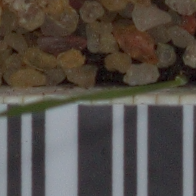

In [4]:
img_color = Image.open(glob.glob(f"data/train/*/{IDS[0]}")[0])
print(f"Tiene 3 colores {np.array(img_color).shape}")
img_color

Tiene 1 canal (196, 196)


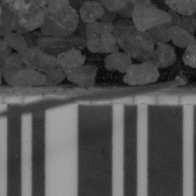

In [5]:
img_gris = img_color.convert('L')
print(f"Tiene 1 canal {np.array(img_gris).shape}")
img_gris

In [6]:
def plot_1_images(d,label, ax=None):
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(d)
    ax.set_title(label=label)
    return fig,ax

In [7]:
ls_size = []
X = []
y = []
for file in glob.glob("data\\train\\*\\*"):
    label = file.split("\\")[2]
    id_img = file.split("\\")[3]
    # gray scale para tener los 3 colores quite la L
    im = Image.open(file).convert('L')
    ls_size.append([im.size[0],im.size[1],label,id_img])
    img_resize = im.resize(desire_size)
    X.append(np.array(img_resize).flatten())
    y.append(label)

In [8]:
np.array(X).shape

(4750, 2500)

In [9]:
y_img = to_categorical(le.transform(y), dtype ="uint8")
X_img = np.reshape(np.array(X), (-1, desire_size[0], desire_size[1]))
X_train,X_test, y_train,y_test = train_test_split(X_img,y_img,test_size=0.2)

In [54]:
#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=16, input_shape=(desire_size[0],desire_size[1],1),
                 kernel_size=(3,3),padding='same', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=60, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=80, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=124, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=160, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(Conv2D(filters=180, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu'))
#model.add(Conv2D(filters=80, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))


# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(200, activation='relu'))

# Add Dropout
model.add(Dropout(0.1))

# 2nd Fully Connected Layer
model.add(Dense(1000, activation='relu'))

# Add Dropout
model.add(Dropout(0.1))

# 3rd Fully Connected Layer
model.add(Dense(50, activation='relu'))

# Add Dropout
model.add(Dropout(0.1))

# Output Layer
model.add(Dense(num_out, activation='softmax'))

model.summary()

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 50, 50, 16)        160       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 25, 25, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 25, 25, 60)        8700      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 12, 12, 60)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 12, 12, 80)        19280     
                                                                 
 conv2d_47 (Conv2D)          (None, 12, 12, 124)      

In [55]:
model.fit(X_train,y_train,  epochs=10, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/10
380/380 [==============================] - 16s 39ms/step - loss: 2.4565 - accuracy: 0.1213 - val_loss: 2.4205 - val_accuracy: 0.1505
Epoch 2/10
380/380 [==============================] - 14s 36ms/step - loss: 2.4265 - accuracy: 0.1361 - val_loss: 2.4186 - val_accuracy: 0.1168
Epoch 3/10
380/380 [==============================] - 14s 36ms/step - loss: 2.4187 - accuracy: 0.1397 - val_loss: 2.4165 - val_accuracy: 0.1421
Epoch 4/10
380/380 [==============================] - 14s 36ms/step - loss: 2.4053 - accuracy: 0.1484 - val_loss: 2.4131 - val_accuracy: 0.1432
Epoch 5/10
380/380 [==============================] - 14s 36ms/step - loss: 2.3935 - accuracy: 0.1571 - val_loss: 2.3590 - val_accuracy: 0.1526
Epoch 6/10
380/380 [==============================] - 14s 36ms/step - loss: 2.3809 - accuracy: 0.1592 - val_loss: 2.3333 - val_accuracy: 0.1716
Epoch 7/10
380/380 [==============================] - 14s 37ms/step - loss: 2.3560 - accuracy: 0.1589 - val_loss: 2.2999 - val_accuracy:

In [56]:
model.fit(X_train,y_train,  epochs=10, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/10
380/380 [==============================] - 14s 37ms/step - loss: 2.0030 - accuracy: 0.3139 - val_loss: 1.7963 - val_accuracy: 0.3589
Epoch 2/10
380/380 [==============================] - 14s 37ms/step - loss: 1.8244 - accuracy: 0.3716 - val_loss: 1.7127 - val_accuracy: 0.3947
Epoch 3/10
380/380 [==============================] - 14s 36ms/step - loss: 1.7214 - accuracy: 0.4034 - val_loss: 1.7812 - val_accuracy: 0.4095
Epoch 4/10
380/380 [==============================] - 14s 36ms/step - loss: 1.6041 - accuracy: 0.4429 - val_loss: 1.6517 - val_accuracy: 0.4337
Epoch 5/10
380/380 [==============================] - 14s 36ms/step - loss: 1.4802 - accuracy: 0.4924 - val_loss: 1.5715 - val_accuracy: 0.4537
Epoch 6/10
380/380 [==============================] - 13s 35ms/step - loss: 1.3808 - accuracy: 0.5187 - val_loss: 1.6119 - val_accuracy: 0.4463
Epoch 7/10
380/380 [==============================] - 15s 41ms/step - loss: 1.2515 - accuracy: 0.5624 - val_loss: 1.5628 - val_accuracy:

In [58]:
model.fit(X_train,y_train,  epochs=2, batch_size=65, validation_data=(X_test, y_test))

Epoch 1/2
59/59 [==============================] - 8s 129ms/step - loss: 0.4621 - accuracy: 0.8466 - val_loss: 2.2065 - val_accuracy: 0.4979
Epoch 2/2
59/59 [==============================] - 8s 127ms/step - loss: 0.4020 - accuracy: 0.8579 - val_loss: 2.3502 - val_accuracy: 0.4884


In [48]:
X_oob = []
file_oob = []
for file in glob.glob("data\\test\\*"):
    im = Image.open(file).convert('L')
    img_resize = im.resize(desire_size)
    X_oob.append(np.array(img_resize).flatten())
    file_oob.append(file.split("\\")[2])

In [49]:
#oob = Out Of Bag
X_oob_img = np.reshape(np.array(X_oob), (-1, desire_size[0], desire_size[1]))
y_hat = le.inverse_transform(np.argmax(model.predict(X_oob_img), axis=1))
df_oob = pd.DataFrame(data= zip(file_oob, y_hat),
                        columns=["file","species"])
df_oob.to_csv("data/prediction_cnngg3.csv", index=False)

25/25 [==============================] - 0s 12ms/step
